In [1]:
import numpy as np
import os
import glob
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 
from sklearn.model_selection import train_test_split 
from keras.utils import to_categorical 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

2023-12-27 15:13:50.488049: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-27 15:13:50.488089: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-27 15:13:50.488126: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-27 15:13:50.497996: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
test = []
train = []
test_labels = []
train_labels = []

categories = ['A', 'B', 'C', 'D', 'E', 'F']

for i in range(len(categories)):
    test_path = './database2/resized/test/' + categories[i]
    train_path = './database2/resized/train/' + categories[i]
    test_images = os.listdir(test_path)
    train_images = os.listdir(train_path)

    for img in test_images:
        try:
            image = Image.open(test_path + '/' + img)
            image = np.array(image)
            test.append(image)
            test_labels.append(i)
        except:
            print("Error loading test image " + img)
    
    for img in train_images:
        try:
            image = Image.open(train_path + '/' + img)
            image = np.array(image)
            train.append(image)
            train_labels.append(i)
        except:
            print("Error loading train image " + img)

In [3]:
test = np.array(test)
train = np.array(train)
test_labels = np.array(test_labels)
train_labels = np.array(train_labels)

print(train.shape, train_labels.shape, test.shape, test_labels.shape)

(25120, 125, 125, 3) (25120,) (3906, 125, 125, 3) (3906,)


In [4]:
test_labels = to_categorical(test_labels, len(categories))
train_labels = to_categorical(train_labels, len(categories))

test_labels[0], train_labels[500]

(array([1., 0., 0., 0., 0., 0.], dtype=float32),
 array([1., 0., 0., 0., 0., 0.], dtype=float32))

In [5]:
train.shape[1:]

(125, 125, 3)

In [12]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=train.shape[1:])) 
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu')) 
model.add(MaxPool2D(pool_size=(2, 2))) 
model.add(Dropout(rate=0.25)) 
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu')) 
model.add(MaxPool2D(pool_size=(2, 2))) 
model.add(Dropout(rate=0.25)) 
model.add(Flatten()) 
model.add(Dense(256, activation='relu')) 
model.add(Dropout(rate=0.5)) 
model.add(Dense(len(categories), activation='softmax')) 
#Compilation of the model 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 121, 121, 32)      2432      
                                                                 
 conv2d_5 (Conv2D)           (None, 117, 117, 32)      25632     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 58, 58, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 58, 58, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 54, 54, 64)        36928     
                                                      

In [13]:
X_train, X_val, y_train, y_val = train_test_split(train, train_labels, test_size=0.15, random_state=42)

In [14]:
y_val.shape, y_train.shape, test_labels.shape

((3768, 6), (21352, 6), (3906, 6))

In [15]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
# Define Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Define Model Checkpoint to save the best model
checkpoint_filepath = 'traffic_sign_categorizer.h5'
model_checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, save_best_only=True, monitor='val_loss', mode='min')

In [16]:
eps = 15
anc = model.fit(X_train, y_train, batch_size=32, epochs=eps, validation_data=(X_val, y_val),
                callbacks=[early_stopping, model_checkpoint])

2023-12-27 15:21:31.183284: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1000875000 exceeds 10% of free system memory.
2023-12-27 15:21:31.998388: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1000875000 exceeds 10% of free system memory.


Epoch 1/15


2023-12-27 15:21:33.308097: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_3/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


668/668 [==============================] - 32s 46ms/step - loss: 2.4487 - accuracy: 0.4978 - val_loss: 0.3410 - val_accuracy: 0.8949
Epoch 2/15
668/668 [==============================] - 31s 46ms/step - loss: 0.2949 - accuracy: 0.9095 - val_loss: 0.2337 - val_accuracy: 0.9228
Epoch 3/15
668/668 [==============================] - 31s 46ms/step - loss: 0.1827 - accuracy: 0.9434 - val_loss: 0.1153 - val_accuracy: 0.9650
Epoch 4/15
668/668 [==============================] - 31s 46ms/step - loss: 0.1669 - accuracy: 0.9449 - val_loss: 0.1016 - val_accuracy: 0.9689
Epoch 5/15
668/668 [==============================] - 30s 45ms/step - loss: 0.1083 - accuracy: 0.9654 - val_loss: 0.2046 - val_accuracy: 0.9379
Epoch 6/15
668/668 [==============================] - 31s 46ms/step - loss: 0.1254 - accuracy: 0.9592 - val_loss: 0.0895 - val_accuracy: 0.9711
Epoch 7/15
668/668 [==============================] - 30s 45ms/step - loss: 0.1140 - accuracy: 0.9627 - val_loss: 0.1744 - val_accuracy: 0.9459
Epo

In [17]:
if early_stopping.stopped_epoch is not None:
    print(f"Early stopping occurred at epoch {early_stopping.stopped_epoch + 1}")
else:
    model.save('traffic_sign_categorizer.h5')
    print("No early stopping occurred.")

Early stopping occurred at epoch 9


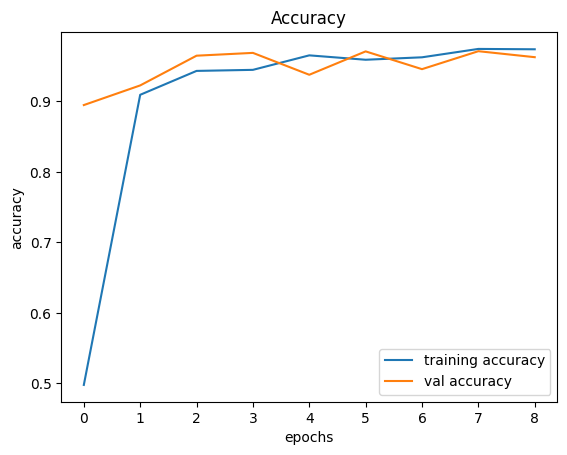

In [18]:
#plotting graphs for accuracy
# Plotting graphs for accuracy
plt.figure(0)
plt.plot(anc.history['accuracy'], label='training accuracy')
plt.plot(anc.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()



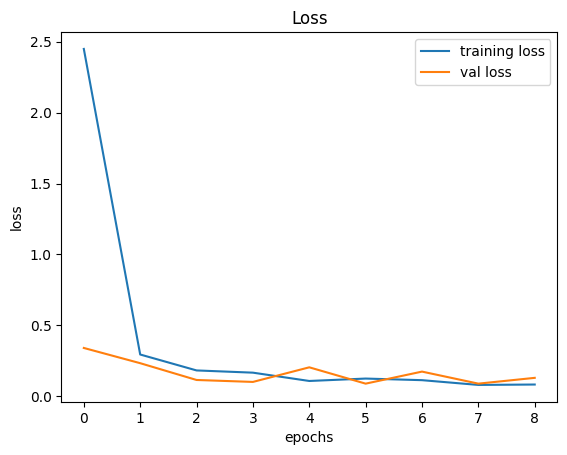

In [19]:
plt.figure(1)
plt.plot(anc.history['loss'], label='training loss')
plt.plot(anc.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [20]:
predictions = model.predict(np.array([test[2500]]))

1/1 [==============================] - 0s 207ms/step


In [21]:
predictions, test_labels[2500]

(array([[2.1411986e-09, 9.8485707e-06, 2.9168953e-06, 4.4857785e-08,
         9.7737485e-11, 9.9998724e-01]], dtype=float32),
 array([0., 0., 0., 0., 0., 1.], dtype=float32))

In [22]:
evaluation = model.evaluate(test, test_labels)
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

123/123 [==============================] - 1s 11ms/step - loss: 0.2811 - accuracy: 0.9032
Test Loss: 0.2811267077922821
Test Accuracy: 0.9032257795333862


123/123 [==============================] - 1s 9ms/step


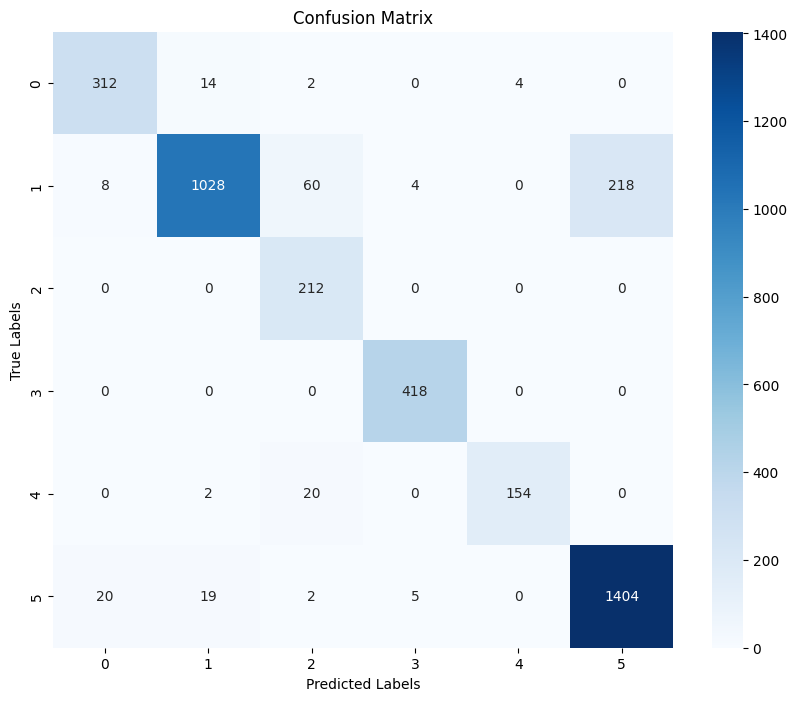

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Make predictions
predictions = model.predict(test)

# If you have one-hot encoded labels, you can use argmax to get the predicted class
predicted_classes = np.argmax(predictions, axis=1)

# Assuming y_test contains true labels (not one-hot encoded)
true_labels = np.argmax(test_labels, axis=1)

# Get predicted labels
predicted_labels = np.argmax(predictions, axis=1)

# Create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


123/123 [==============================] - 1s 9ms/step


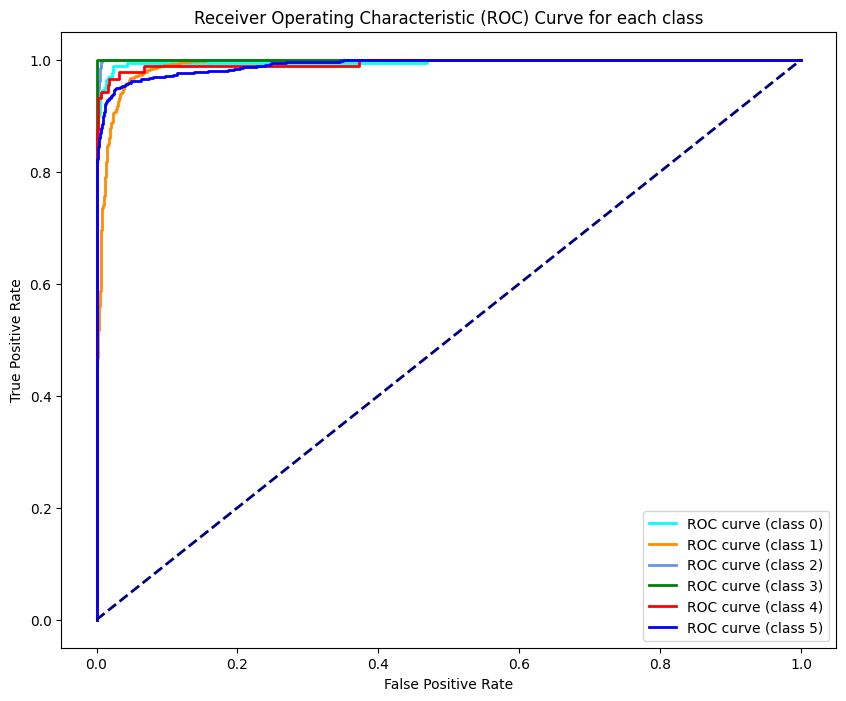

In [24]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Assuming y_test contains true labels (not one-hot encoded)
true_labels = np.argmax(test_labels, axis=1)

# Binarize the true labels
true_labels_bin = label_binarize(true_labels, classes=np.arange(len(categories)))

# Get predicted probabilities for each class
predictions = model.predict(test)

# Convert predictions to probabilities
predicted_probs = predictions / np.sum(predictions, axis=1, keepdims=True)


# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'blue', 'purple', 'brown', 'pink', 'gray'])
for i, color in zip(range(len(categories)), colors):
    fpr, tpr, _ = roc_curve(true_labels_bin[:, i], predicted_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label='ROC curve (class {})'.format(i))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc='lower right')
plt.show()


In [26]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy
# load the trained model to classify sign
from keras.models import load_model

model = load_model('traffic_sign_categorizer.h5')
# dictionary to label all traffic signs class.
classes = {1: 'A - No right, left, or U-turn',
           2: 'B - Speed limits',
           3: 'C - Road closed',
           4: 'D - No entry',
           5: 'E - No stopping, no parking',
           6: 'F - Other types of prohibitory traffic signs',
           }

# initialise GUI
top = tk.Tk()
top.geometry('800x600')
top.title('Traffic sign classification')
top.configure(background='#CDCDCD')

label = Label(top, background='#CDCDCD', font=('arial', 15, 'bold'))
sign_image = Label(top)


def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((125, 125))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    # Use predict method
    pred_probs = model.predict(image)
    
    # Find the index of the class with the highest probability
    pred_class = numpy.argmax(pred_probs)
    
    sign = classes[pred_class + 1]
    print(sign)
    label.configure(foreground='#011638', text=sign)


def show_classify_button(file_path):
    classify_b = Button(top, text="Classify Image", command=lambda: classify(file_path), padx=10, pady=5)
    classify_b.configure(background='#364156', foreground='white', font=('arial', 10, 'bold'))
    classify_b.place(relx=0.79, rely=0.46)


def upload_image():
    try:
        file_path = filedialog.askopenfilename()
        uploaded = Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width() / 2.25), (top.winfo_height() / 2.25)))
        im = ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image = im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass


upload = Button(top, text="Upload an image", command=upload_image, padx=10, pady=5)
upload.configure(background='#364156', foreground='white', font=('arial', 10, 'bold'))
upload.pack(side=BOTTOM, pady=50)

sign_image.pack(side=BOTTOM, expand=True)
label.pack(side=BOTTOM, expand=True)

heading = Label(top, text="Check traffic sign", pady=20, font=('arial', 20, 'bold'))
heading.configure(background='#CDCDCD', foreground='#364156')
heading.pack()

top.mainloop()


1/1 [==============================] - 0s 72ms/step
B - Speed limits
1/1 [==============================] - 0s 16ms/step
B - Speed limits
1/1 [==============================] - 0s 15ms/step
F - Other types of prohibitory traffic signs
